In [1]:
# To setup everything (on the bash terminal to execute jupyter nb)
# !./install.sh
# !. ./env.sh
# !which python
# !jupyter notebook --ip="0.0.0.0" 

In [2]:
import demo

synt_model_dict = {
    "16": "g_00086000",
    "32": "g_00068000",
    "48": "g_00086000",
    "64": "g_00058000",
    "128": "g_00087000",
    "256": "g_00080000",
    "768": "g_00079000",
}

models = []

synthesis_model, synthesis_sr = demo.init_speech_synthesis_model(
    "checkpoints/lj_vq_tdnnf_asr/config.json",
    "checkpoints/lj_vq_tdnnf_asr/g_00080000",
    root_dir="speech-resynthesis/",
)

pk_model = demo.init_pkwrap_model(
    model="local/chain/e2e/tuning/tdnnf.py",
    exp_path="exp/chain/e2e_tdnnf/",
    pkwrap_vq_dim="-1",
)

models.append({"asr": pk_model, "synthesis": synthesis_model, "dim": "no_vq"})

for dim, synt_model in synt_model_dict.items():
    synthesis_model, synthesis_sr = demo.init_speech_synthesis_model(
        f"checkpoints/lj_vq_tdnnf_asr_vq_{dim}/config.json",
        f"checkpoints/lj_vq_tdnnf_asr_vq_{dim}/{synt_model}",
        root_dir="speech-resynthesis/",
    )

    pk_model = demo.init_pkwrap_model(
        model=f"local/chain/e2e/tuning/tdnnf_vq.py",
        exp_path=f"exp/chain/e2e_tdnnf_vq_sizeco_{dim}/",
        pkwrap_vq_dim=dim,
    )
    
    models.append({f"asr": pk_model, "synthesis": synthesis_model, "dim": dim})


Loading 'checkpoints/lj_vq_tdnnf_asr/g_00080000'
Loading 'exp/chain/e2e_tdnnf/final.pt'


CRITICAL:root:pkwrap: -- Failed to import kaldi you better not be in training mode (no backward possible) --


Loading 'checkpoints/lj_vq_tdnnf_asr_vq_16/g_00086000'
Loading 'exp/chain/e2e_tdnnf_vq_sizeco_16/final.pt'
Loading 'checkpoints/lj_vq_tdnnf_asr_vq_32/g_00068000'
Loading 'exp/chain/e2e_tdnnf_vq_sizeco_32/final.pt'
Loading 'checkpoints/lj_vq_tdnnf_asr_vq_48/g_00086000'
Loading 'exp/chain/e2e_tdnnf_vq_sizeco_48/final.pt'
Loading 'checkpoints/lj_vq_tdnnf_asr_vq_64/g_00058000'
Loading 'exp/chain/e2e_tdnnf_vq_sizeco_64/final.pt'
Loading 'checkpoints/lj_vq_tdnnf_asr_vq_128/g_00087000'
Loading 'exp/chain/e2e_tdnnf_vq_sizeco_128/final.pt'
Loading 'checkpoints/lj_vq_tdnnf_asr_vq_256/g_00080000'
Loading 'exp/chain/e2e_tdnnf_vq_sizeco_256/final.pt'
Loading 'checkpoints/lj_vq_tdnnf_asr_vq_768/g_00079000'
Loading 'exp/chain/e2e_tdnnf_vq_sizeco_768/final.pt'


In [3]:
from ipywebrtc import AudioRecorder, CameraStream
import torch, torchaudio, os, tempfile, subprocess
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
from IPython.display import Audio, HTML
display(HTML("<style>div.output_scroll { height: 100em; }</style>"))

In [21]:
recordid="013"

text_gt = subprocess.check_output(f"cat pkwrap/egs/librispeech/v1/data/vctk_test_trials_f_common/text | head -n{recordid} | tail -n1 | cut -d\  -f2-", shell=True).decode("UTF-8").strip()
print(text_gt)
camera = CameraStream(constraints={'audio': True,'video':False})
recorder = AudioRecorder(stream=camera)
display(recorder)

SOME HAVE ACCEPTED IT AS A MIRACLE WITHOUT PHYSICAL EXPLANATION


AudioRecorder(audio=Audio(value=b'', format='webm'), stream=CameraStream(constraints={'audio': True, 'video': …

In [34]:
# Recorded Audio from previous cell

# tmpf = tempfile.NamedTemporaryFile(suffix='.webm')
# tmpfwav = tempfile.NamedTemporaryFile(suffix='.wav').name
# tmpf.write(recorder.audio.value)
# webm = tmpf.name
# !ffmpeg -i $webm -ac 1 -f wav $tmpfwav -y -hide_banner -loglevel panic 
# tmpf.close()
# waveform, sr = torchaudio.load(tmpfwav)

# Local Audio
waveform, sr = torchaudio.load(f"pkwrap/egs/librispeech/v1/data/vctk_test/wav/p226/p226_{recordid}_mic2.wav")

# waveform, sr = torchaudio.load(f"speech-resynthesis/data/LJSpeech-1.1/wavs_16khz/LJ001-0011.wav")
# text_gt = "IT IS OF THE FIRST IMPORTANCE THAT THE LETTER USED SHOULD BE FINE IN FORM"

# waveform, sr = torchaudio.load(f"pkwrap/egs/librispeech/v1/corpora/LibriSpeech/test-other/2414/128292/2414-128292-0015.flac")
# text_gt = "WHEN THE DEVIL CASTETH HIS SKIN DOTH NOT HIS NAME ALSO FALL AWAY IT IS ALSO SKIN"

# waveform, sr = torchaudio.load(f"pkwrap/egs/librispeech/v1/corpora/LibriSpeech/test-other/2414/128292/2414-128292-0018.flac")
# text_gt = "THEN ONLY DID I HIT THE TRUTH"

waveform, sr = torchaudio.load(f"pkwrap/egs/librispeech/v1/corpora/LibriSpeech/test-other/1688/142285/1688-142285-0015.flac")
text_gt = "HOW TAINTED ASKED HER FATHER"

# waveform, sr = torchaudio.load(f"pkwrap/egs/librispeech/v1/corpora/LibriSpeech/test-other/6938/70848/6938-70848-0012.flac")
# text_gt = "WHEREUPON THE OLD EXECUTIVE COMMITTEE LEFT THE HALL"

waveform = torchaudio.transforms.Resample(orig_freq=sr,
                                                   new_freq=16000)(waveform)
waveform = waveform.to(device)
Audio(data=waveform.cpu(), rate=16000)

In [36]:
vq_model = "16"
out, net = models[list(synt_model_dict.keys()).index(vq_model)+1]["asr"](waveform.to(device).clone())

vq_model = "256"
_out, _net = models[(["no_vq"] + list(synt_model_dict.keys())).index(vq_model)]["asr"](waveform.to(device).clone())
_text, align = demo.kaldi_asr_decode(_out, get_align=True)
print(_text)

assert len(align) == len(net.encoding_indices)

HOW TAINTED OR STUFFER


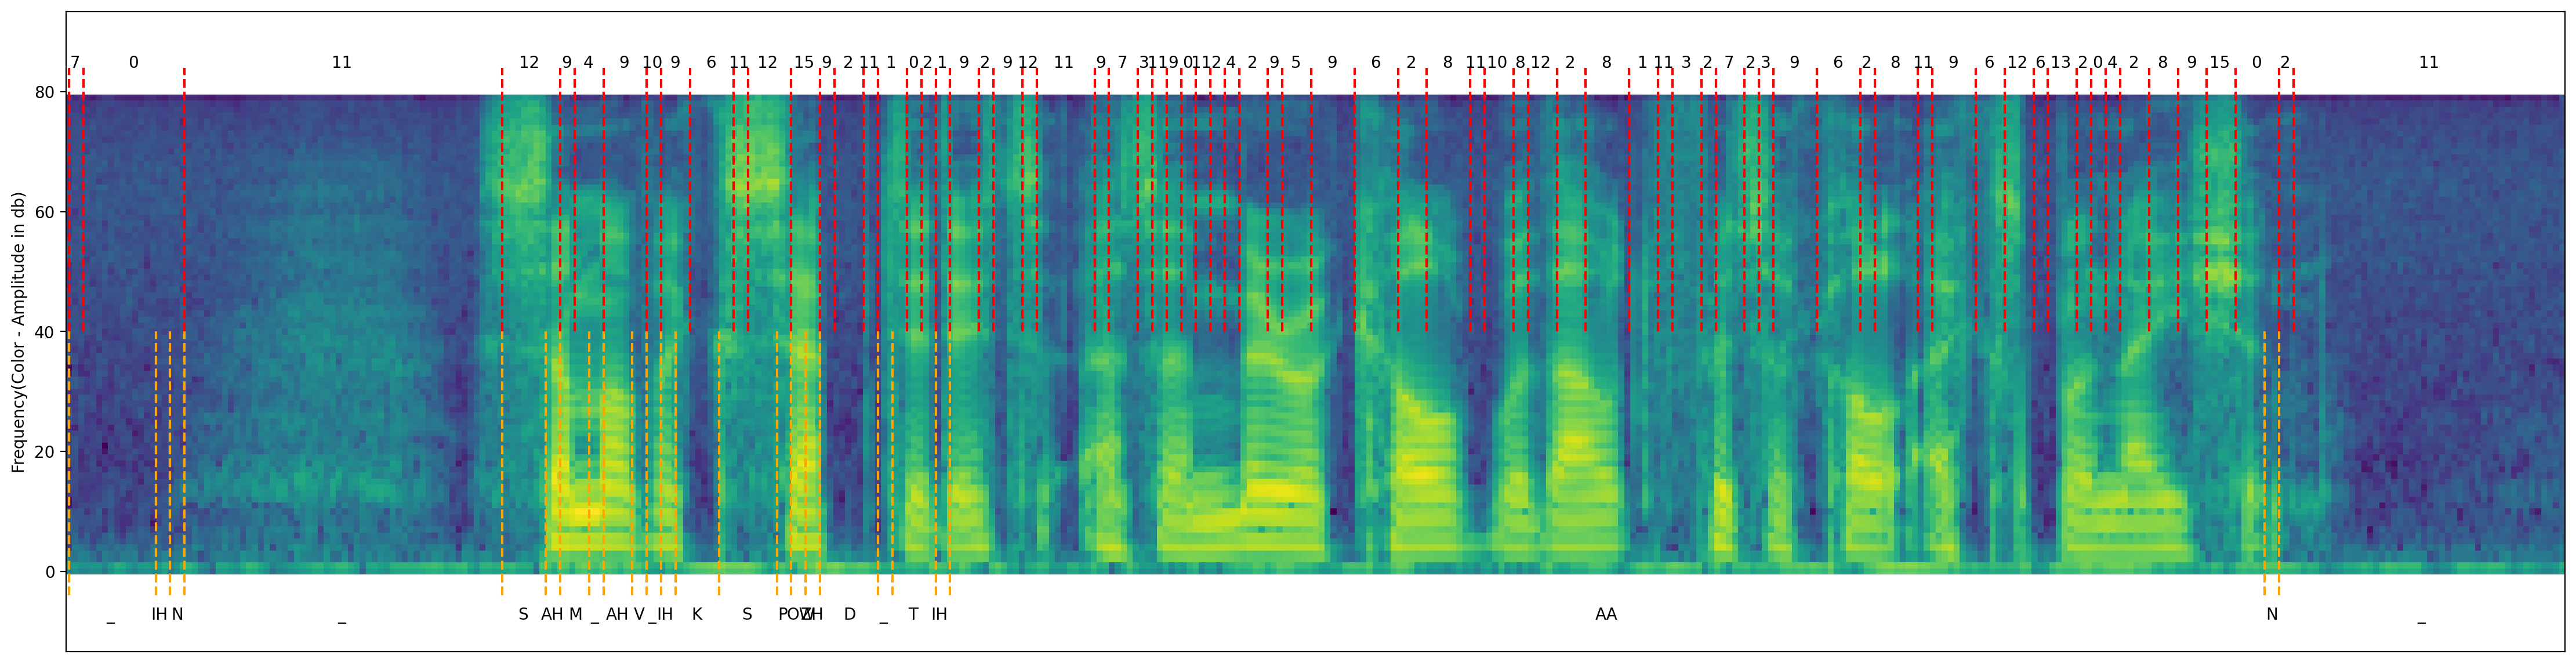

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import statistics 


amp = torchaudio.transforms.AmplitudeToDB()
specgram = torchaudio.transforms.MelSpectrogram(sr, n_mels=80)(waveform.cpu())

ratio = (specgram.shape[2] / len(net.encoding_indices))

fig = plt.figure(figsize=(specgram.shape[2]/15, 8), dpi=200)
plt.imshow(amp(specgram)[0,:,:].numpy())
plt.gca().invert_yaxis()
# plt.xlabel('Time')
plt.xticks([])
plt.ylabel('Frequency(Color - Amplitude in db)')

boundaries = []
old_enc_id = -1
enc_indice_collaps = []
for i, enc_id in enumerate(net.encoding_indices):
    if old_enc_id != enc_id:
        old_enc_id = enc_id
        boundaries.append(ratio*i)
        enc_indice_collaps.append(f"{enc_id.item()}")
                
plt.vlines(boundaries, 40, 84, linestyles='dashed', colors='red')

boundaries += [specgram.shape[2]]
for i, bound in enumerate(boundaries[1:]):
    _x = statistics.median([boundaries[i], bound])
    plt.text(_x-len(enc_indice_collaps[i]), 84, enc_indice_collaps[i], rotation=0)



boundaries = []
old_align = -1
align_collaps = []
for i, ali in enumerate(align):
    if old_align != ali:
        old_align = ali
        boundaries.append(ratio*i)
        align_collaps.append(f"{ali}")

plt.vlines(boundaries, -4, 40, linestyles='dashed', colors='orange')

boundaries += [specgram.shape[2]]
for i, bound in enumerate(boundaries[1:]):
    _x = statistics.median([boundaries[i], bound])
    plt.text(_x-len(align_collaps[i]), -8, align_collaps[i], rotation=0)        

x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,y1 - 5 ,y2 + 5))
plt.show()

In [35]:
f0 = demo.get_f0(
    waveform.cpu(), f0_stats_file="speech-resynthesis/datasets/LJSpeech/f0_stats.pth"
)
    
for model in models:
    print("Running for codebook size: " + model["dim"])
    out, net = model["asr"](waveform.to(device).clone())
    text = demo.kaldi_asr_decode(out)

    audio = model["synthesis"](net.bottleneck_out.permute(0, 2, 1).contiguous(), f0)
    _,_, repport = demo.ComputeWER(text, text_gt)
    display(HTML(repport, metadata=dict(isolated=True)))
    print(f"Synthesis from ASR bottleneck {model['dim']}: ")
    display(Audio(data=audio, rate=synthesis_sr))

Running for codebook size: no_vq


Synthesis from ASR bottleneck no_vq: 


Running for codebook size: 16


Synthesis from ASR bottleneck 16: 


Running for codebook size: 32


Synthesis from ASR bottleneck 32: 


Running for codebook size: 48


Synthesis from ASR bottleneck 48: 


Running for codebook size: 64


Synthesis from ASR bottleneck 64: 


Running for codebook size: 128


Synthesis from ASR bottleneck 128: 


Running for codebook size: 256


Synthesis from ASR bottleneck 256: 


Running for codebook size: 768


Synthesis from ASR bottleneck 768: 
